# Linear regression (Batch gradient descent)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

### Creating data:

In [19]:
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1) # to mske noise on linear regression

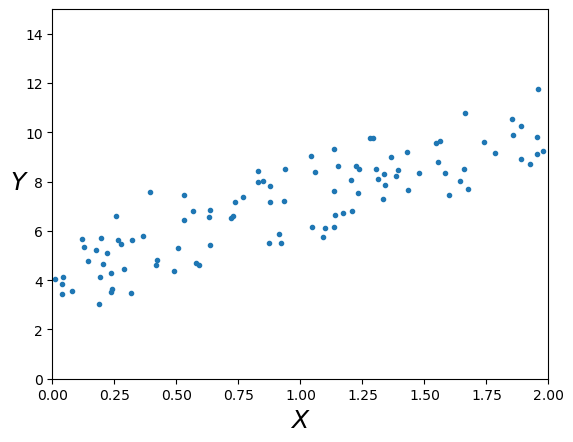

In [20]:
plt.plot(x, y, '.')
plt.xlabel('$X$', fontsize = 18)
plt.ylabel('$Y$', fontsize = 18, rotation = 0)
plt.axis([0, 2, 0, 15]);

### BGD:

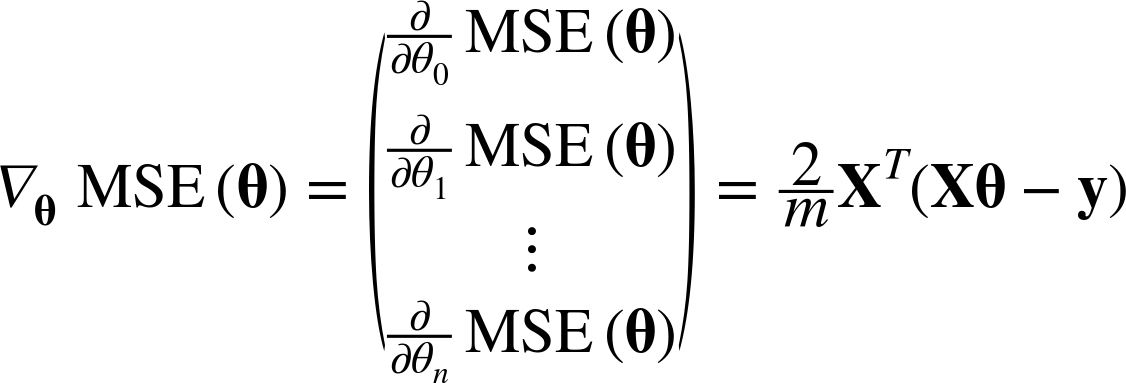

(array([[4.22215103],
        [2.96846755]]),
 0.9924386487246487,
 [17.43877194350867])

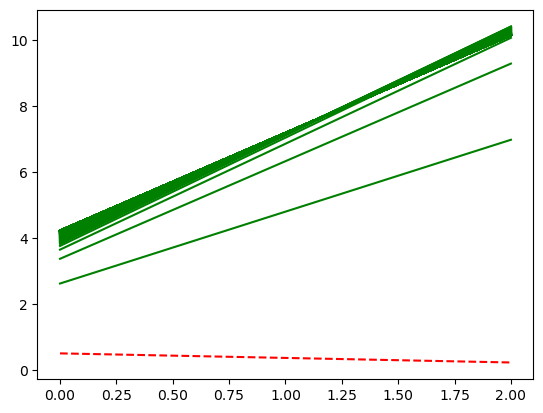

In [21]:
#=======================================================
# Commented lines with ** are used to plot training plot
#=======================================================
def bgd(X, Y, epochs, l_rate):
    np.random.seed(42)
    cost_list = []
    x_new = np.array([[0], [2]]) # **
    x_new_b = np.append(np.ones((2, 1)), x_new, axis = 1) # **
    m = len(X)
    X_b = np.append(np.ones((len(X), 1)), X, axis = 1) # Adding X(0) bias
    W = np.random.randn(X_b.shape[1] ,1)
    for epoch in range(epochs):
        if epoch % 2 == 0: # **
            y_p = x_new_b.dot(W) # **
            style = 'r--' if epoch == 0 else 'g-' # **
            plt.plot(x_new, y_p, style) # **
        gradients = 2/m * X_b.T.dot(X_b.dot(W) - Y)
        W = W - l_rate * gradients
        cost = 1/m * np.sum(np.square(X_b.dot(W) - Y))
        if epoch == 0:
            cost_list.append(cost)
    return W, cost, cost_list

bgd(x, y, 500, 0.1)
# plt.plot(x, y, "b.") # **                                 
# plt.xlabel("$x_1$", fontsize=18) # **                   
# plt.ylabel("$y$", rotation=0, fontsize=18) # **           
# plt.axis([0, 2, 0, 15]); # **

### Training plot:

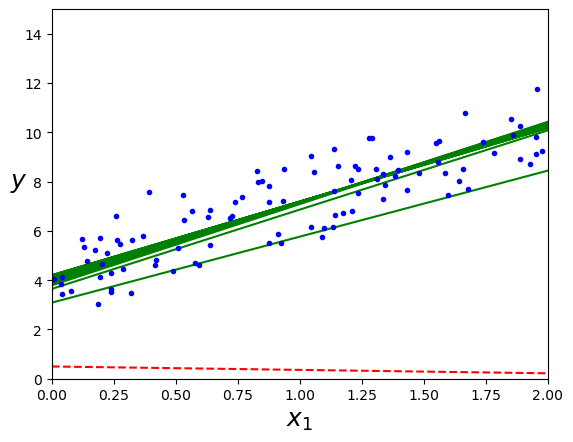

### Predection:

In [128]:
def predect(X, W = bgd(x, y, 500, 0.1)[0]):
    X_b = np.append(np.ones((len(X), 1)), X, axis = 1)
    predections = X_b.dot(W)
    return predections
new_x = np.array([[0], [1], [2]])
predections = predect(new_x)
predections

array([[ 4.22215103],
       [ 7.19061858],
       [10.15908613]])

### Predection plot:

(0.0, 2.0, 0.0, 15.0)

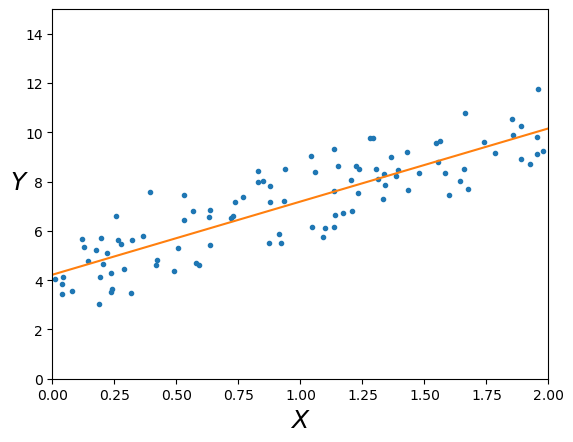

In [124]:
plt.plot(x, y, '.')
plt.plot(new_x, predections, '-')
plt.xlabel('$X$', fontsize = 18)
plt.ylabel('$Y$', fontsize = 18, rotation = 0)
plt.axis([0, 2, 0, 15])